In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
import torch
from model.model_load import load_model
from configs.setting import global_setting

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
record = pd.read_csv('log.txt', sep='|')
record.head(3)

cols = list(record.columns)[1:]
record = record[cols]
record.head(3)

,train_loss,valid_loss,train_acc,valid_acc
0,0.009227,0.008671,0.060711,0.057799
1,0.009206,0.008630,0.060573,0.057562
2,0.009223,0.008618,0.060637,0.057631


In [5]:
print(record.describe().loc['mean'])

train_loss    0.002293
valid_loss    0.002228
train_acc     0.018534
valid_acc     0.017388
Name: mean, dtype: float64


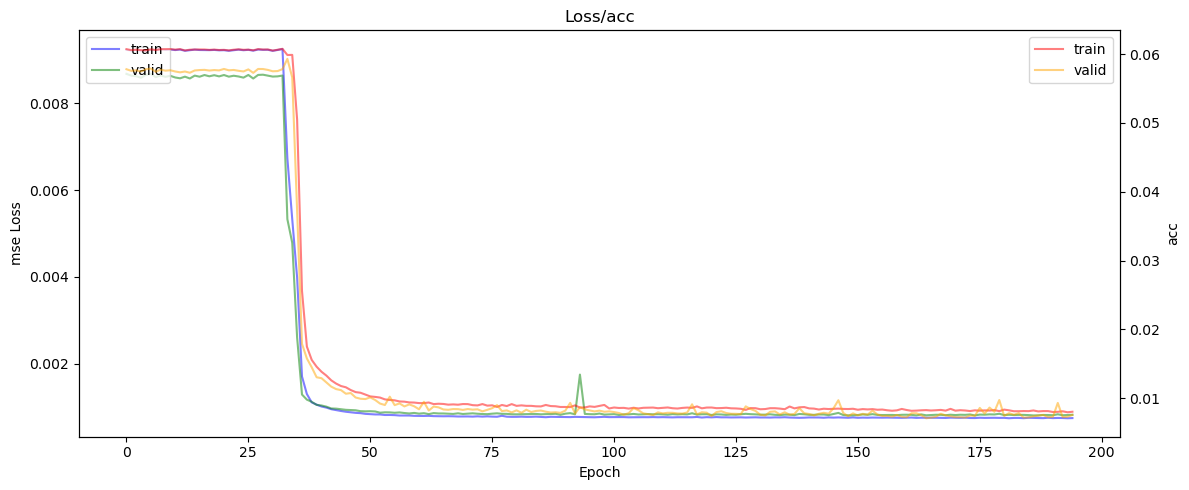

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.set_title('Loss/acc')
ax.set_xlabel('Epoch')

ax.set_ylabel('mse Loss')
ax.plot(record['train_loss'], color='blue', alpha=0.5)
ax.plot(record['valid_loss'], color='green', alpha=0.5)

ax2.set_ylabel('acc')
ax2.plot(record['train_acc'], color='red', alpha=0.5)
ax2.plot(record['valid_acc'], color='orange', alpha=0.5)

ax.legend(['train', 'valid'], loc='upper left')
ax2.legend(['train', 'valid'], loc='upper right')

# ax.set_xticks(gdp['date'].dt.date)
# ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
# ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [7]:
config, device = global_setting('cfg.yaml')
model = load_model(device, config)

In [8]:
checkpoint_dir='ckpt/{}'.format(config['MODEL']['NAME'])
file_name = os.listdir(checkpoint_dir)[-1]
print(file_name)
checkpoint_path='{}/{}'.format(checkpoint_dir, file_name)

221205-1557_Adam_best46.pth


In [9]:
ckpt = torch.load(checkpoint_path)
model.load_state_dict(ckpt)

<All keys matched successfully>

In [10]:
df = pd.read_excel('res/win_set.xlsx')

In [11]:
import joblib
scaler_x = 'ckpt/SCALER/x_scaler.pkl'
scaler_y = 'ckpt/SCALER/y_scaler.pkl'
sc_x = joblib.load(scaler_x)
sc_y = joblib.load(scaler_y)

In [12]:
input_df=df[config['DATA']['X_COLS']]
target_df = df[config['DATA']['Y_TARGET']]

In [13]:
from torch import FloatTensor

xvalue = sc_x.transform(input_df.values[:100])
X_tensor = FloatTensor(xvalue)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
outputs = model(X_tensor)

In [15]:
pred = sc_y.inverse_transform(outputs.float().detach().numpy()).ravel()
# pred = outputs.float().detach().numpy().ravel()

# target = sc_y.transform(target_df.values[:100]).ravel()
target = target_df.values[:100].ravel()


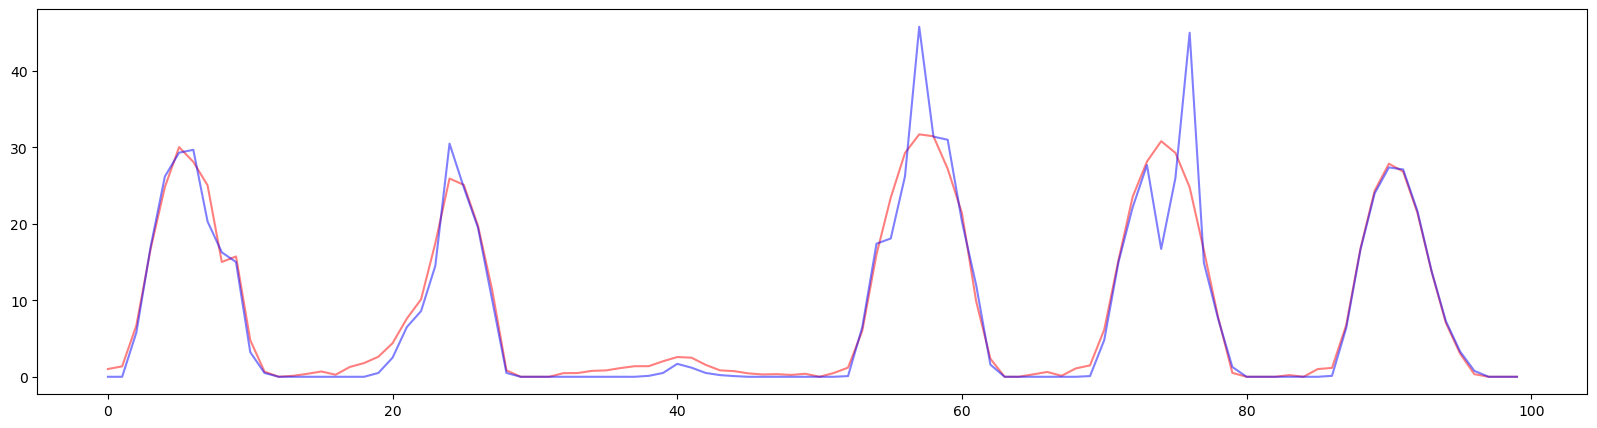

In [16]:
fig = plt.figure(figsize=(20, 5))
plt.plot(pred, color='r', label='predict', alpha=0.5)
plt.plot(target, color='b', label='actual', alpha=0.5)
plt.show()

- mae      0.007830
- mse      0.000261
- rmse     0.012601
- mape     inf